In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from darts import TimeSeries
import torch
import torch.nn as nn
from sklearn.metrics import r2_score

In [24]:
def plot_predicted(time_series, plot_labels, plot_colors):
    i = 0
    for series in time_series:
        plot_array = series.values()
        plt.plot(plot_array, color=plot_colors[i], label=plot_labels[i])
        i += 1
    plt.legend()
    plt.show()

    

In [25]:
def predict_for_all_data(start_series, series_to_predict, model, forecast_period, input_lag):
    values_to_forecast = len(series_to_predict)
    no_of_iterations = int(values_to_forecast/forecast_period) + \
        (values_to_forecast % forecast_period)

    start_position = 0
    prediction_list = []
    combined_series = start_series[-input_lag:].concatenate(
        series_to_predict, ignore_time_axis=True)

    for i in range(no_of_iterations):
        start_position = forecast_period * i
        # prediction_values = model.predict(
        #     forecast_period, series=combined_series[:input_lag+start_position])
        prediction_values = series_to_predict[start_position: start_position+forecast_period]
        prediction_list.append(list(prediction_values.values()))

    prediction_list = prediction_list[:values_to_forecast]

    return prediction_list

In [26]:
start_series = TimeSeries.from_values(np.array([0,1,2,3,4,5]))
series_to_predict = TimeSeries.from_values(np.array([6,8,9,10,11,12,13,14,15,16,17,18,19,20]))
forecast_period = 2
input_lag = 3


In [31]:
predicted_array = np.array(predict_for_all_data(
    start_series, series_to_predict, None, forecast_period, input_lag)).flatten()

In [32]:
plot_labels = ["Actual Values", "Predicted Values"]
plot_colors = ['r', 'b']

In [33]:
print(predicted_array)

[ 6.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17. 18. 19. 20.]


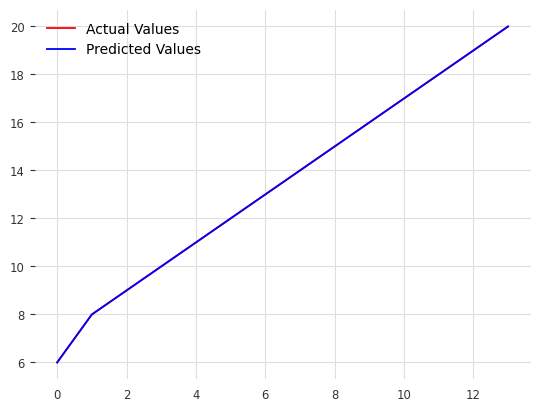

In [35]:
plot_predicted([series_to_predict, TimeSeries.from_values(
    predicted_array)], plot_labels, plot_colors)